In [7]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings('ignore')


data_train = pd.read_table("a3-train.data",delim_whitespace=True,header=None)
data_test = pd.read_table("a3-test.data",delim_whitespace=True,header=None)
data_train_labels=pd.read_table("a3-train.labels.txt",delim_whitespace=True,header=None)
data_test_labels=pd.read_table("a3-test.labels.txt",delim_whitespace=True,header=None)
print(data_train.shape)
print(data_test.shape)
print(data_train_labels.shape)
print(data_test_labels.shape)
data_train=pd.DataFrame(data_train)
data_train_labels=pd.DataFrame(data_train_labels)
data_test=pd.DataFrame(data_test)
data_test_labels=pd.DataFrame(data_test_labels)

#features with continuous numeric value
data_train_num = data_train.select_dtypes(include=['int64'])
data_test_num = data_test.select_dtypes(include=['int64'])
data_train_labels_num = data_train_labels.select_dtypes(include=['int64'])
data_test_lables_num=data_test_labels.select_dtypes(include=['int64'])

# print(data_train_num.shape)
print(data_test_num.shape)
print(data_train_labels_num.shape)
print(data_test_lables_num.shape)

#Are there any features which have missing values
print(sum(data_train.isnull().sum()))
print(sum(data_test.isnull().sum()))
print(sum(data_train_labels.isnull().sum()))
print(sum(data_test_labels.isnull().sum()))

#find categorical feature
data_train_cat = data_train.select_dtypes(exclude=['int64'])
data_test_cat = data_test.select_dtypes(exclude=['int64'])
print(data_train_cat)
print(data_test_cat)

##Normalisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Ntrain=sc.fit_transform(data_train_num)
Ntest=sc.fit_transform(data_test_num )


(2000, 500)
(600, 500)
(2000, 1)
(600, 1)
(600, 500)
(2000, 1)
(600, 1)
0
0
0
0
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2000 rows x 0 columns]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[600 rows x 0 columns]


In [8]:
#Check whether the data is balanced or not

print(data_train_labels[0].value_counts())
print(data_test_labels[0].value_counts())

#Conclusion : Both Training and Testing data are balanced


 1    1000
-1    1000
Name: 0, dtype: int64
 1    300
-1    300
Name: 0, dtype: int64


In [9]:
#Correlation between Input value and Target
c = pd.concat([data_train,data_train_labels])
c.head()
correlations = c.corr()[0].sort_values()

print('Most Negative Correlations:\n', correlations.tail(25))
print('\nMost Positive Correlations:\n', correlations.head(25))

Most Negative Correlations:
 478    0.040020
379    0.041329
79     0.042493
339    0.042578
382    0.042646
1      0.042789
470    0.043941
442    0.045680
144    0.045854
375    0.045897
11     0.046545
7      0.046846
405    0.047323
188    0.047608
342    0.048105
291    0.049475
472    0.049647
392    0.049702
173    0.054904
109    0.057586
254    0.062004
357    0.062390
210    0.062672
67     0.074946
0      1.000000
Name: 0, dtype: float64

Most Positive Correlations:
 449   -0.061279
182   -0.060576
280   -0.055201
406   -0.054829
51    -0.054285
176   -0.053968
163   -0.051533
48    -0.049515
82    -0.047932
378   -0.047141
499   -0.046535
271   -0.045901
389   -0.045510
421   -0.044350
347   -0.044252
438   -0.043113
309   -0.040859
222   -0.039837
196   -0.039430
156   -0.037308
317   -0.036996
18    -0.035264
72    -0.034952
415   -0.034839
149   -0.034808
Name: 0, dtype: float64


value of Accuracy_train:  0.960500
value of Accuracy_test:  0.611667
value of Accuracy_train:  1.000000
value of Accuracy_test:  0.698333
value of Accuracy_train:  1.000000
value of Accuracy_test:  0.711667
value of Accuracy_train:  1.000000
value of Accuracy_test:  0.648333
value of Accuracy_train:  1.000000
value of Accuracy_test:  0.720000
value of maximum Accuracy_train:  1.000000
value of maximum Accuracy_test:  0.720000


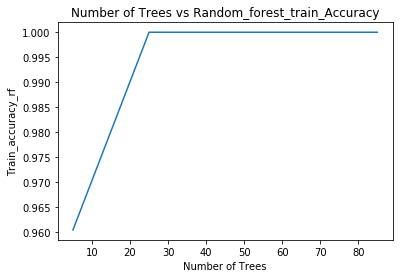

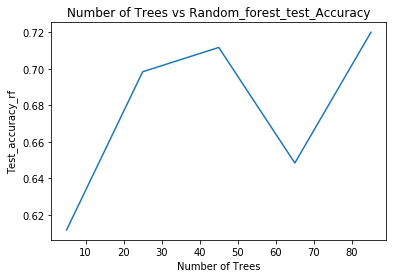

In [11]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
Train_accuracy_rf1=[]
Test_accuracy_rf1=[]
K1=[]
for k1 in range(5,101,20):
    clf1=RandomForestClassifier(n_estimators=k1)
    clf1.fit(data_train,data_train_labels)
                        
    train_accuracy_rf1=clf1.score(data_train,data_train_labels)
    Train_accuracy_rf1.append( train_accuracy_rf1)
    print("value of Accuracy_train:%10f"% train_accuracy_rf1)

    test_accuracy_rf1=clf1.score(data_test,data_test_labels)
    Test_accuracy_rf1.append(test_accuracy_rf1)
    K1.append(k1)
    print("value of Accuracy_test:%10f"% test_accuracy_rf1)
k_rf1=max(Train_accuracy_rf1)
k1_rf1=max(Test_accuracy_rf1)

print("value of maximum Accuracy_train:%10f"% k_rf1)
print("value of maximum Accuracy_test:%10f"% k1_rf1)

plt.ylabel('Train_accuracy_rf')
plt.xlabel('Number of Trees')
plt.plot(K1,Train_accuracy_rf1)
plt.title("Number of Trees vs Random_forest_train_Accuracy")
plt.show()

plt.ylabel('Test_accuracy_rf')
plt.xlabel('Number of Trees')
plt.plot(K1,Test_accuracy_rf1)
plt.title("Number of Trees vs Random_forest_test_Accuracy")
plt.show()

value of maximum Accuracy_train:  1.000000
value of maximum Accuracy_test:  0.838333


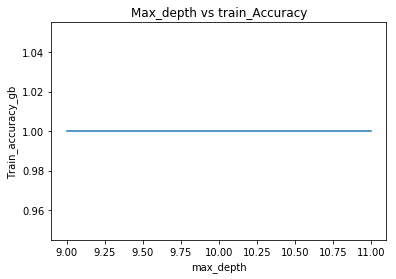

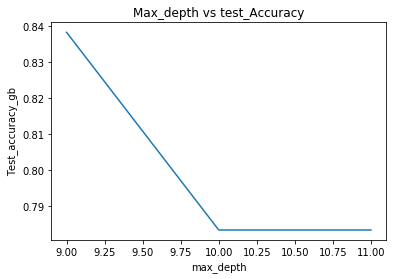

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

Max_depth=[]
Test_Acc=[]
Train_Acc=[]
for i in range(9,12):
    GB=GradientBoostingClassifier(max_depth=i)
    GB.fit(data_train,data_train_labels)
    Train_Accuracy_score=GB.score(data_train,data_train_labels)
    Train_Acc.append(Train_Accuracy_score)
    Test_Accuracy_score=GB.score(data_test,data_test_labels)
    Test_Acc.append(Test_Accuracy_score)
    Max_depth.append(i)
k1_gb=max(Train_Acc)
k_gb=max(Test_Acc)
print("value of maximum Accuracy_train:%10f"% k1_gb)
print("value of maximum Accuracy_test:%10f"% k_gb)

plt.ylabel('Train_accuracy_gb')
plt.xlabel('max_depth')
plt.plot( Max_depth,Train_Acc)
plt.title("Max_depth vs train_Accuracy")
plt.show()

plt.ylabel('Test_accuracy_gb')
plt.xlabel('max_depth')
plt.plot( Max_depth,Test_Acc)
plt.title("Max_depth vs test_Accuracy")
plt.show()



n-neighbors:4.000000
Accuracy_train:  0.805500
Accuracy_test:  0.670000
n-neighbors:5.000000
Accuracy_train:  0.826500
Accuracy_test:  0.691667
n-neighbors:6.000000
Accuracy_train:  0.793000
Accuracy_test:  0.708333
n-neighbors:7.000000
Accuracy_train:  0.803500
Accuracy_test:  0.721667
n-neighbors:8.000000
Accuracy_train:  0.792500
Accuracy_test:  0.723333
value of maximum Accuracy_train:  0.826500
value of maximum Accuracy_test:  0.723333


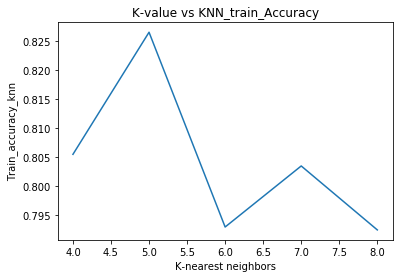

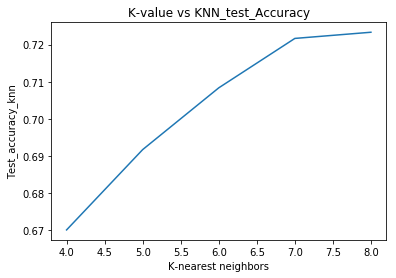

In [13]:
#knn
Train_accuracy_knn=[]
Test_accuracy_knn=[]
K_value=[]
from sklearn import preprocessing, cross_validation,neighbors
for n_neighbors in range(4,9):
    clf=neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(data_train,data_train_labels)
    train_accuracy=clf.score(data_train,data_train_labels)
    print("n-neighbors:%1f"%n_neighbors)
    print("Accuracy_train:%10f"% train_accuracy)
    Train_accuracy_knn.append(train_accuracy)
           
    test_accuracy=clf.score(data_test,data_test_labels)
    print("Accuracy_test:%10f"% test_accuracy)
    Test_accuracy_knn.append(test_accuracy)
    K_value.append(n_neighbors)
    

k_knn=max(Train_accuracy_knn)
k1_knn=max(Test_accuracy_knn)
print("value of maximum Accuracy_train:%10f"% k_knn)
print("value of maximum Accuracy_test:%10f"% k1_knn)

plt.ylabel('Train_accuracy_knn')
plt.xlabel('K-nearest neighbors')
plt.plot(K_value,Train_accuracy_knn)
plt.title("K-value vs KNN_train_Accuracy")
plt.show()

plt.ylabel('Test_accuracy_knn')
plt.xlabel('K-nearest neighbors')
plt.plot(K_value,Test_accuracy_knn)
plt.title("K-value vs KNN_test_Accuracy")
plt.show()


In [14]:
 # Feature Processing to improve accuracy
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import SelectKBest,chi2

S1=SelectKBest(chi2, k=12)
data_train1=S1.fit_transform(data_train,data_train_labels)
data_test1=S1.transform(data_test)



from sklearn.feature_selection import SelectKBest,chi2
S=SelectKBest(chi2, k=15)
data_train2=S.fit_transform(data_train,data_train_labels)
data_test2=S.transform(data_test)




value of Accuracy_train:  0.964500
value of Accuracy_test:  0.838333
value of Accuracy_train:  0.982500
value of Accuracy_test:  0.860000
value of Accuracy_train:  0.983500
value of Accuracy_test:  0.848333
value of Accuracy_train:  0.985000
value of Accuracy_test:  0.870000
value of Accuracy_train:  0.989500
value of Accuracy_test:  0.880000
value of Accuracy_train:  0.990500
value of Accuracy_test:  0.878333
value of Accuracy_train:  0.992000
value of Accuracy_test:  0.875000
value of Accuracy_train:  0.992500
value of Accuracy_test:  0.871667
value of Accuracy_train:  0.991500
value of Accuracy_test:  0.878333
value of Accuracy_train:  0.993000
value of Accuracy_test:  0.870000
value of Accuracy_train:  0.993500
value of Accuracy_test:  0.870000
value of Accuracy_train:  0.993000
value of Accuracy_test:  0.878333
value of Accuracy_train:  0.993000
value of Accuracy_test:  0.873333
value of Accuracy_train:  0.995000
value of Accuracy_test:  0.871667
value of Accuracy_train:  0.994000

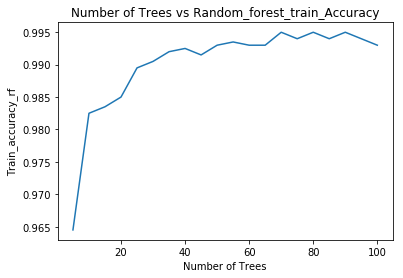

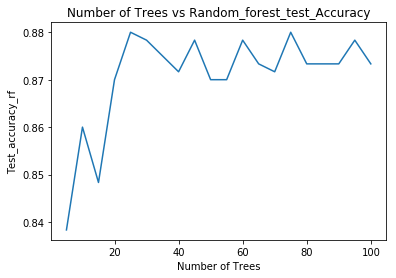

In [15]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
Train_accuracy_rf=[]
Test_accuracy_rf=[]
K=[]
for k in range(5,101,5):
    clf1=RandomForestClassifier(n_jobs=-1,criterion="entropy",min_samples_leaf=1,min_samples_split=8, \
                                                n_estimators=k,max_features=None,random_state=100)
    clf1.fit(data_train2,data_train_labels)
                        
    train_accuracy_rf=clf1.score(data_train2,data_train_labels)
    Train_accuracy_rf.append( train_accuracy_rf)
    print("value of Accuracy_train:%10f"% train_accuracy_rf)

    test_accuracy_rf=clf1.score(data_test2,data_test_labels)
    Test_accuracy_rf.append(test_accuracy_rf)
    K.append(k)
    print("value of Accuracy_test:%10f"% test_accuracy_rf)
k_rf=max(Train_accuracy_rf)
k1_rf=max(Test_accuracy_rf)

print("value of maximum Accuracy_train:%10f"% k_rf)
print("value of maximum Accuracy_test:%10f"% k1_rf)

plt.ylabel('Train_accuracy_rf')
plt.xlabel('Number of Trees')
plt.plot(K,Train_accuracy_rf)
plt.title("Number of Trees vs Random_forest_train_Accuracy")
plt.show()

plt.ylabel('Test_accuracy_rf')
plt.xlabel('Number of Trees')
plt.plot(K,Test_accuracy_rf)
plt.title("Number of Trees vs Random_forest_test_Accuracy")
plt.show()

    


value of maximum Accuracy_train:  1.000000
value of maximum Accuracy_test:  0.870000


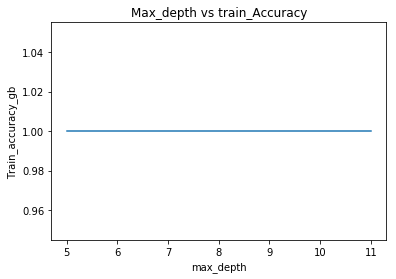

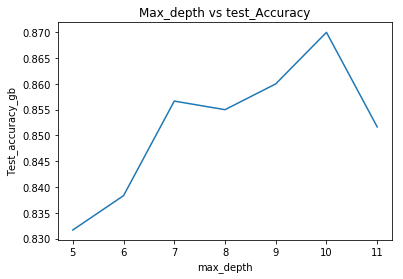

In [16]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

Max_depth=[]
Test_Acc=[]
Train_Acc=[]
for i in range(5,12):
    GB=GradientBoostingClassifier(learning_rate=0.6,loss="exponential",n_estimators=80,random_state=100,max_depth=i)
    GB.fit(data_train1,data_train_labels)
    Train_Accuracy_score=GB.score(data_train1,data_train_labels)
    Train_Acc.append(Train_Accuracy_score)
    Test_Accuracy_score=GB.score(data_test1,data_test_labels)
    Test_Acc.append(Test_Accuracy_score)
    Max_depth.append(i)
k1_gb=max(Train_Acc)
k_gb=max(Test_Acc)
print("value of maximum Accuracy_train:%10f"% k1_gb)
print("value of maximum Accuracy_test:%10f"% k_gb)

plt.ylabel('Train_accuracy_gb')
plt.xlabel('max_depth')
plt.plot( Max_depth,Train_Acc)
plt.title("Max_depth vs train_Accuracy")
plt.show()

plt.ylabel('Test_accuracy_gb')
plt.xlabel('max_depth')
plt.plot( Max_depth,Test_Acc)
plt.title("Max_depth vs test_Accuracy")
plt.show()



n-neighbors:4.000000
Accuracy_train:  1.000000
Accuracy_test:  0.890000
n-neighbors:5.000000
Accuracy_train:  1.000000
Accuracy_test:  0.895000
n-neighbors:6.000000
Accuracy_train:  1.000000
Accuracy_test:  0.906667
n-neighbors:7.000000
Accuracy_train:  1.000000
Accuracy_test:  0.893333
n-neighbors:8.000000
Accuracy_train:  1.000000
Accuracy_test:  0.895000
n-neighbors:9.000000
Accuracy_train:  1.000000
Accuracy_test:  0.885000
n-neighbors:10.000000
Accuracy_train:  1.000000
Accuracy_test:  0.891667
n-neighbors:11.000000
Accuracy_train:  1.000000
Accuracy_test:  0.878333
n-neighbors:12.000000
Accuracy_train:  1.000000
Accuracy_test:  0.890000
n-neighbors:13.000000
Accuracy_train:  1.000000
Accuracy_test:  0.888333
n-neighbors:14.000000
Accuracy_train:  1.000000
Accuracy_test:  0.881667
n-neighbors:15.000000
Accuracy_train:  1.000000
Accuracy_test:  0.883333
n-neighbors:16.000000
Accuracy_train:  1.000000
Accuracy_test:  0.881667
n-neighbors:17.000000
Accuracy_train:  1.000000
Accuracy_

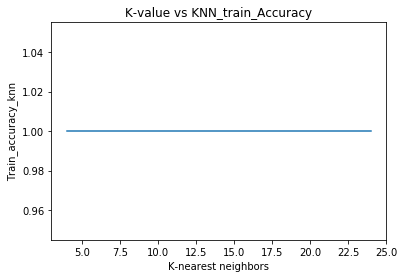

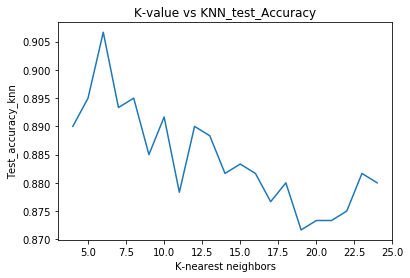

In [17]:
#knn
Train_accuracy_knn=[]
Test_accuracy_knn=[]
K_value=[]
from sklearn import preprocessing, cross_validation,neighbors
for n_neighbors in range(4,25):
    clf=neighbors.KNeighborsClassifier(n_jobs=-1, n_neighbors=n_neighbors,leaf_size=26,p=2,weights='distance')
    clf.fit(data_train2,data_train_labels)
    train_accuracy=clf.score(data_train2,data_train_labels)
    print("n-neighbors:%1f"%n_neighbors)
    print("Accuracy_train:%10f"% train_accuracy)
    Train_accuracy_knn.append(train_accuracy)
           
    test_accuracy=clf.score(data_test2,data_test_labels)
    print("Accuracy_test:%10f"% test_accuracy)
    Test_accuracy_knn.append(test_accuracy)
    K_value.append(n_neighbors)
    

k_knn=max(Train_accuracy_knn)
k1_knn=max(Test_accuracy_knn)
print("value of maximum Accuracy_train:%10f"% k_knn)
print("value of maximum Accuracy_test:%10f"% k1_knn)

plt.ylabel('Train_accuracy_knn')
plt.xlabel('K-nearest neighbors')
plt.plot(K_value,Train_accuracy_knn)
plt.title("K-value vs KNN_train_Accuracy")
plt.show()


plt.ylabel('Test_accuracy_knn')
plt.xlabel('K-nearest neighbors')
plt.plot(K_value,Test_accuracy_knn)
plt.title("K-value vs KNN_test_Accuracy")
plt.show()


In [10]:
import numpy as np
a=np.array([1,2,3,4,5,6])
a=np.reshape(a,(2,3))

In [11]:
print(a.shape)

(2, 3)


In [12]:
a.reshape(6)

array([1, 2, 3, 4, 5, 6])